In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [120]:
import pandas as pd

# Load the CSV file
file_path = "reduced_output.csv"
df = pd.read_csv(file_path)

# Display basic info and the first few rows
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       10038 non-null  object
 1   Category   10100 non-null  object
 2   Date       10100 non-null  object
 3   Upvotes    10100 non-null  int64 
 4   Subreddit  10100 non-null  object
dtypes: int64(1), object(4)
memory usage: 394.7+ KB


(None,
                                                 Text  Category  \
 0  This man is a cut above the rest, outdoor or i...  No Slang   
 1                                      Why not four?  No Slang   
 2                                          MAGA baby  No Slang   
 3  I doubt even ChatGPT would come up with a stor...  No Slang   
 4  I feel that's kinda true but at the same time ...  No Slang   
 
                   Date  Upvotes  Subreddit  
 0  2025-03-18 12:36:49        1     soccer  
 1  2025-03-15 16:30:40        5      funny  
 2  2025-03-18 04:43:41        1  AskReddit  
 3  2025-03-18 12:48:15       87     gaming  
 4  2025-03-18 12:43:17        1     soccer  )

In [122]:
data = df.copy()
data.describe()

,Upvotes
count,10100.000000
mean,78.394257
std,1641.629572
min,-167.000000
25%,1.000000
50%,2.000000
75%,10.000000
max,104279.000000


In [123]:
data.isnull().sum()

Text         62
Category      0
Date          0
Upvotes       0
Subreddit     0
dtype: int64

In [124]:
data.duplicated().sum()

np.int64(6)

In [125]:
data = data.dropna(subset=['Text'])

data = data.drop_duplicates()

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10032 entries, 0 to 10099
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       10032 non-null  object
 1   Category   10032 non-null  object
 2   Date       10032 non-null  object
 3   Upvotes    10032 non-null  int64 
 4   Subreddit  10032 non-null  object
dtypes: int64(1), object(4)
memory usage: 470.2+ KB


In [127]:
data['TextLength'] = data['Text'].apply(len)

In [128]:
# lower_bound = data['TextLength'].quantile(0.01)
# upper_bound = data['TextLength'].quantile(0.99)

# data = data[(data['TextLength'] >= lower_bound) & (data['TextLength'] <= upper_bound)]

<Axes: >

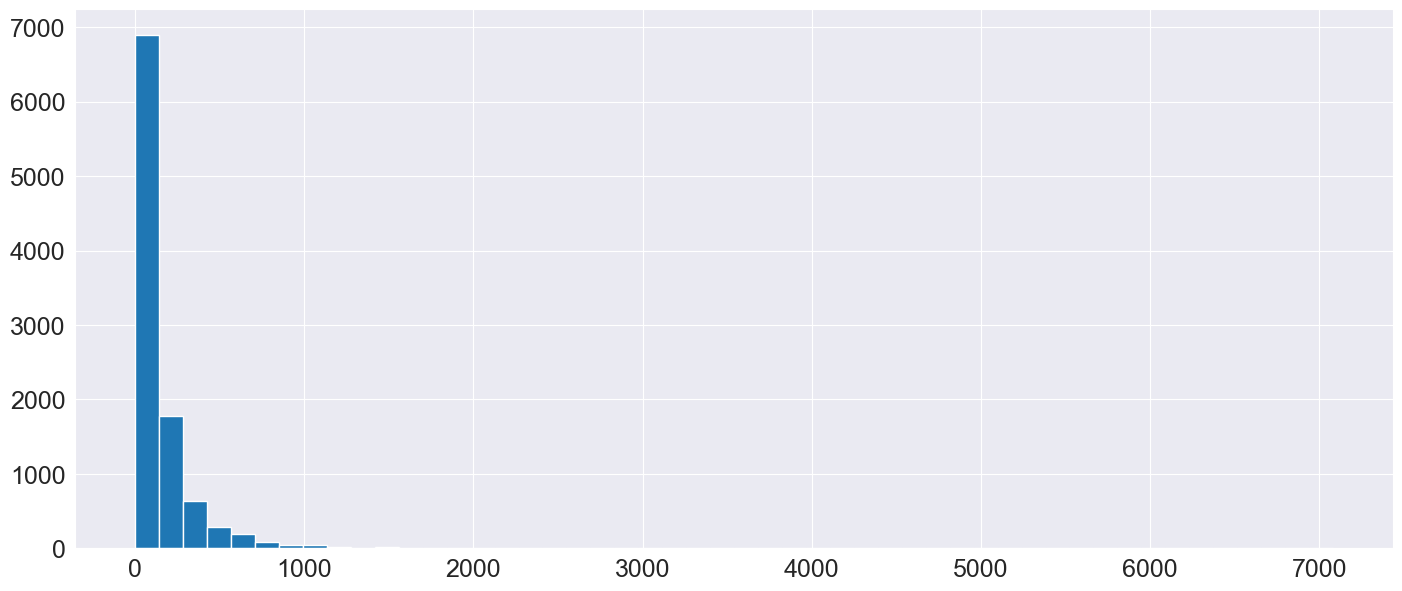

In [129]:
# Now apply the len() function safely
data['Text_length'] = data['Text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Visualize the distribution of text lengths
data['Text_length'].hist(bins=50)

<Axes: >

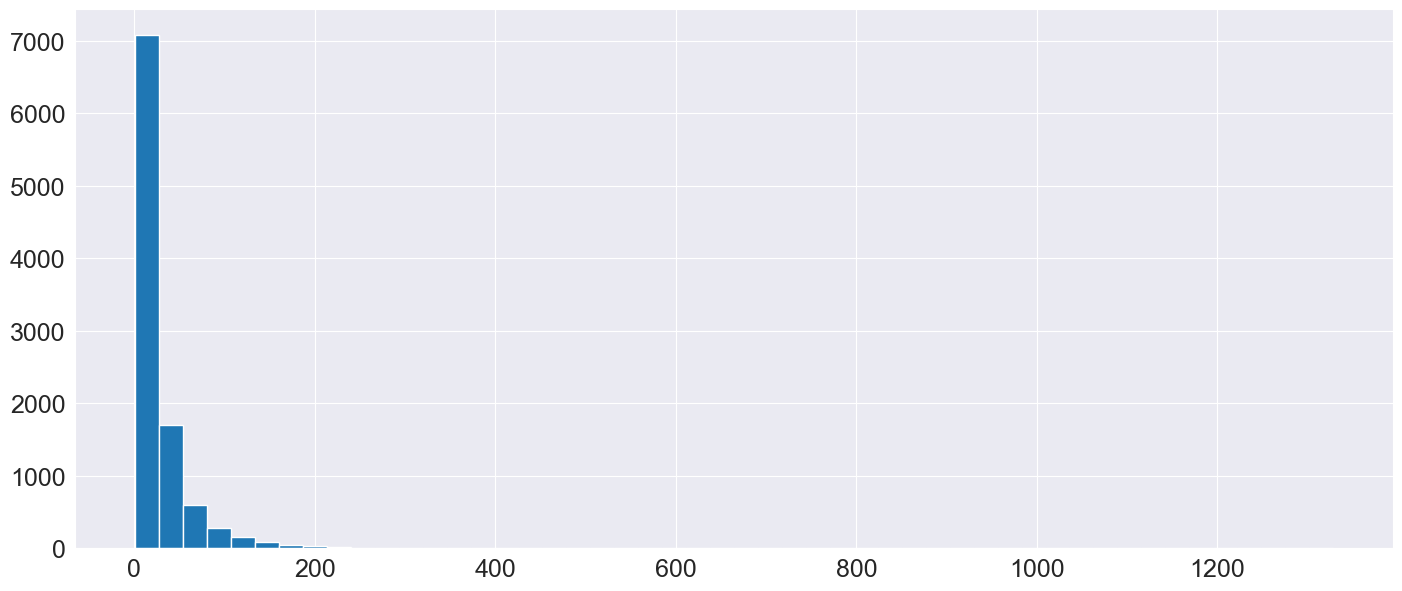

In [130]:
data['Word_count'] = data['Text'].apply(lambda x: len(x.split()))
data['Word_count'].hist(bins=50)


In [131]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # hapus URL
    text = re.sub(r"[^a-z\s]", "", text)  # hapus semua non-huruf
    text = re.sub(r"\s+", " ", text).strip()  # hapus spasi berlebih
    return text

data["Cleaned_Text"] = data["Text"].apply(clean_text)

In [132]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

all_words = ' '.join(data['Cleaned_Text']).split()
filtered_words = [word for word in all_words if word not in stop_words]
word_freq = Counter(filtered_words)
common_words = word_freq.most_common(20)  # Top 20 most common words
common_words


[('like', 1408),
 ('people', 934),
 ('dont', 918),
 ('one', 827),
 ('im', 767),
 ('would', 741),
 ('get', 736),
 ('game', 712),
 ('time', 659),
 ('think', 606),
 ('even', 582),
 ('also', 516),
 ('really', 494),
 ('good', 491),
 ('thats', 486),
 ('know', 478),
 ('still', 464),
 ('make', 448),
 ('much', 435),
 ('games', 417)]

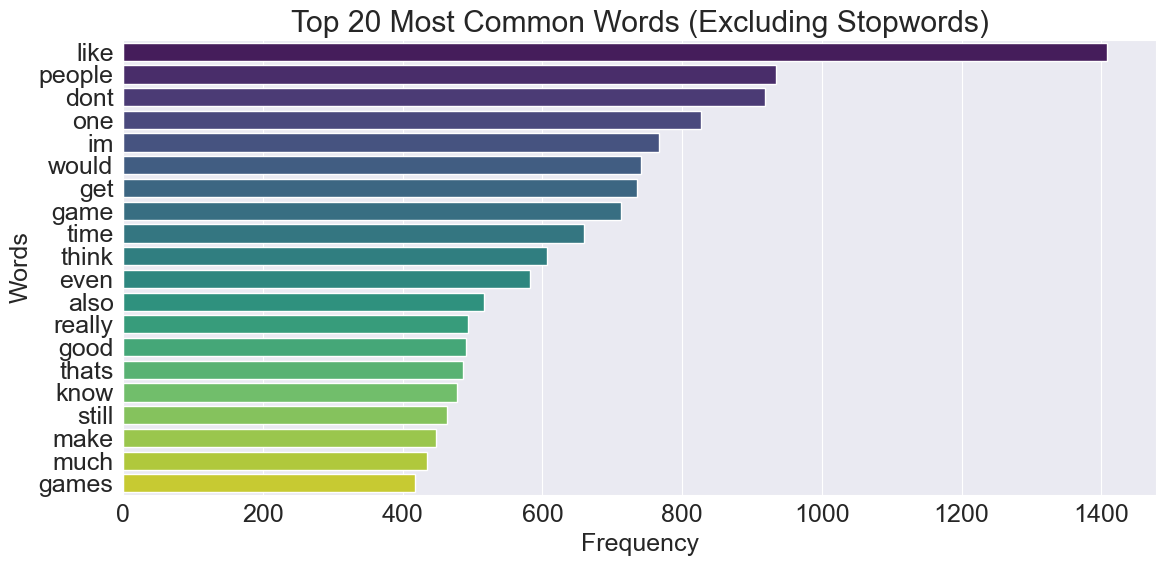

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unpack words and their frequencies
words, frequencies = zip(*common_words)

# Set plot style
plt.figure(figsize=(12, 6))
sns.barplot(x=list(frequencies), y=list(words), palette='viridis')

# Add titles and labels
plt.title('Top 20 Most Common Words (Excluding Stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.tight_layout()

plt.show()



In [135]:
from nltk.util import ngrams
from collections import Counter
import nltk
nltk.download('punkt')

# Tokenize all text
all_tokens = nltk.word_tokenize(' '.join(data['Cleaned_Text']).lower())

# Remove stopwords and non-alphabetic tokens
filtered_tokens = [word for word in all_tokens if word.isalpha() and word not in stop_words]

# Generate bigrams
bigrams = list(ngrams(filtered_tokens, 2))

# Count bigram frequencies
bigram_freq = Counter(bigrams)
common_bigrams = bigram_freq.most_common(20)

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
bigram_labels = [' '.join(bigram) for bigram, count in common_bigrams]
bigram_counts = [count for bigram, count in common_bigrams]

# Plot
plt.figure


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

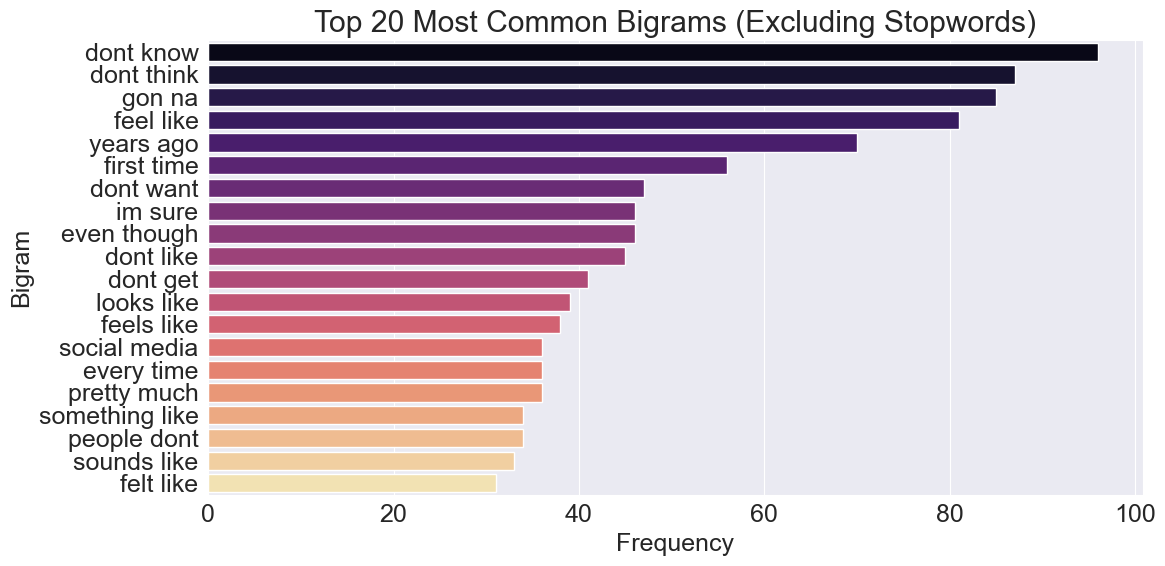

In [136]:
plt.figure(figsize=(12, 6))
sns.barplot(x=bigram_counts, y=bigram_labels, palette='magma')

plt.title('Top 20 Most Common Bigrams (Excluding Stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.tight_layout()
plt.show()  # <--- this is crucial to display the plot


<Axes: title={'center': 'Subreddit Distribution'}, xlabel='Subreddit'>

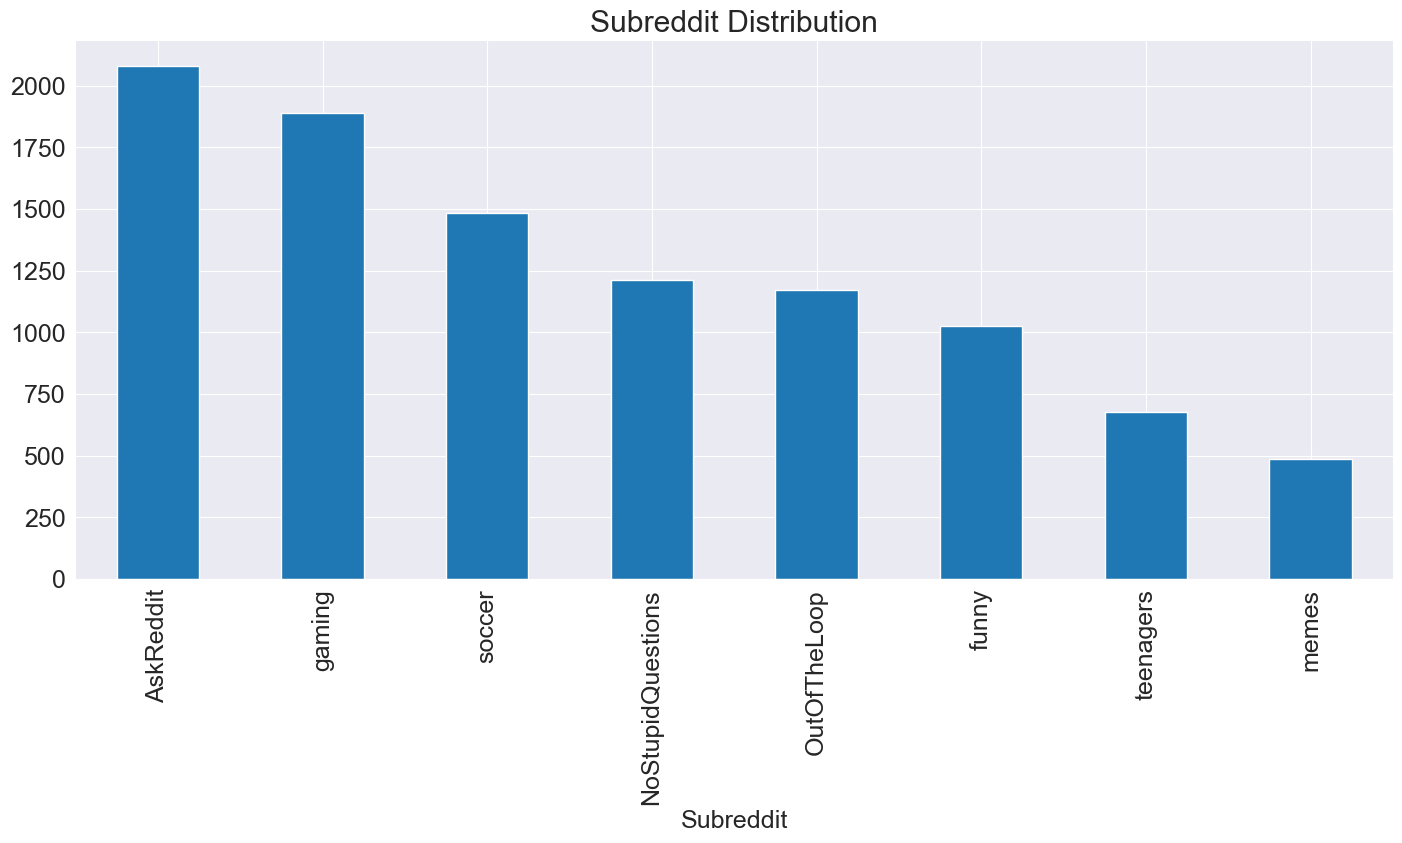

In [137]:
data['Subreddit'].value_counts().plot(kind='bar', title='Subreddit Distribution')

In [140]:
# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
# Extract time-based features
data['Hour'] = data['Date'].dt.hour
data['DayOfWeek'] = data['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year


<Axes: title={'center': 'Posts per Hour'}, xlabel='Hour'>

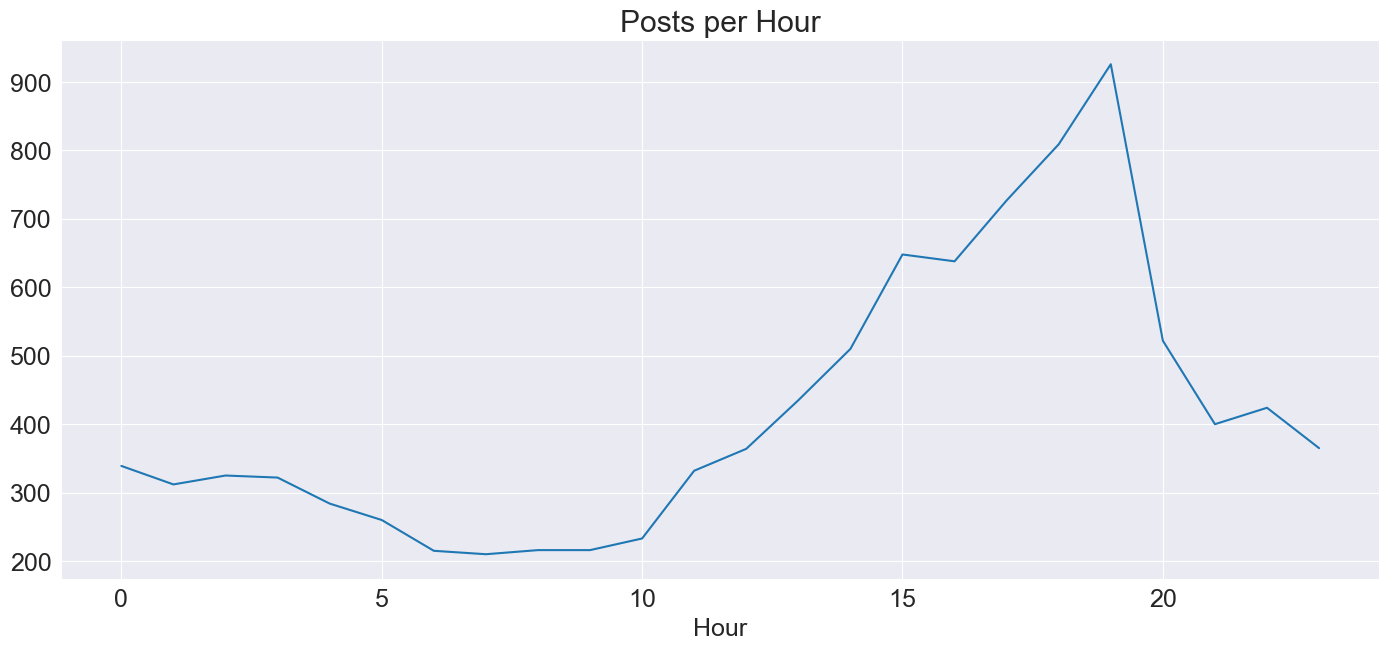

In [141]:
# Plot the distribution of posts by hour
data['Hour'].value_counts().sort_index().plot(kind='line', title='Posts per Hour')


<Axes: title={'center': 'Posts per Day of Week'}, xlabel='DayOfWeek'>

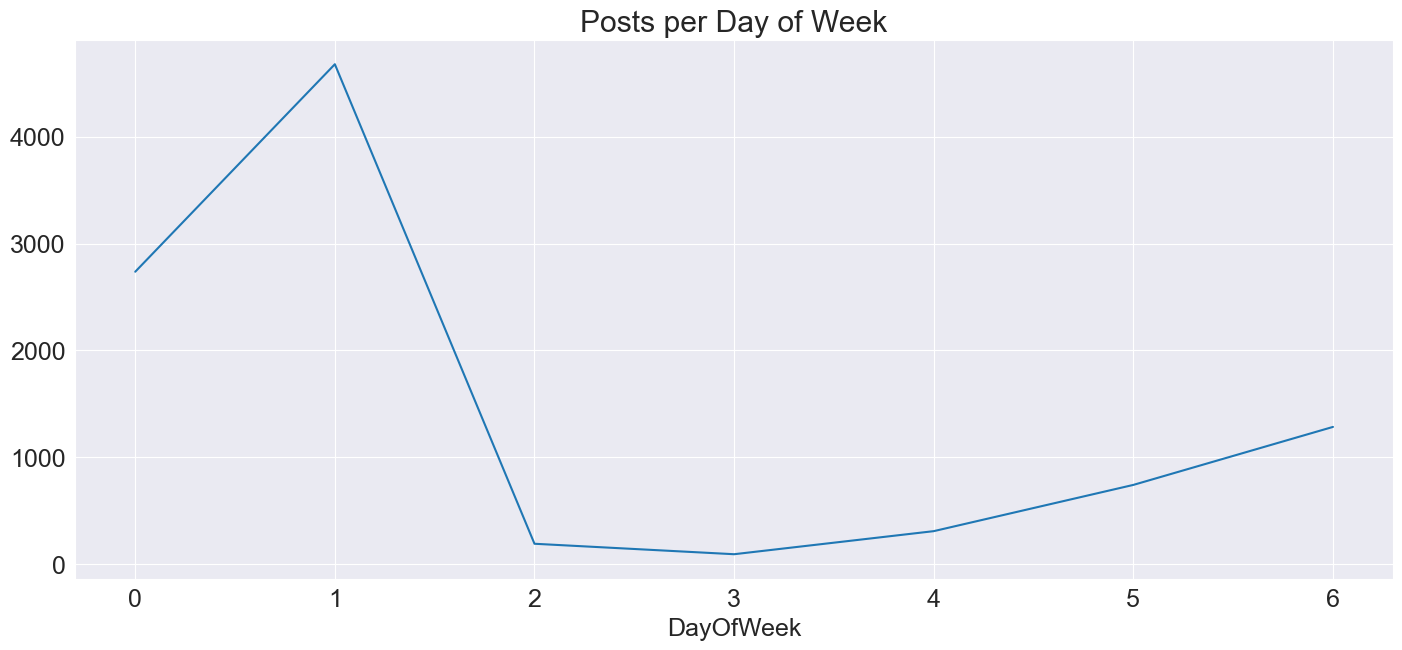

In [143]:
# Plot the distribution of posts by day of the week
data['DayOfWeek'].value_counts().sort_index().plot(kind='line', title='Posts per Day of Week')


<Axes: title={'center': 'Posts per Month'}, xlabel='Month'>

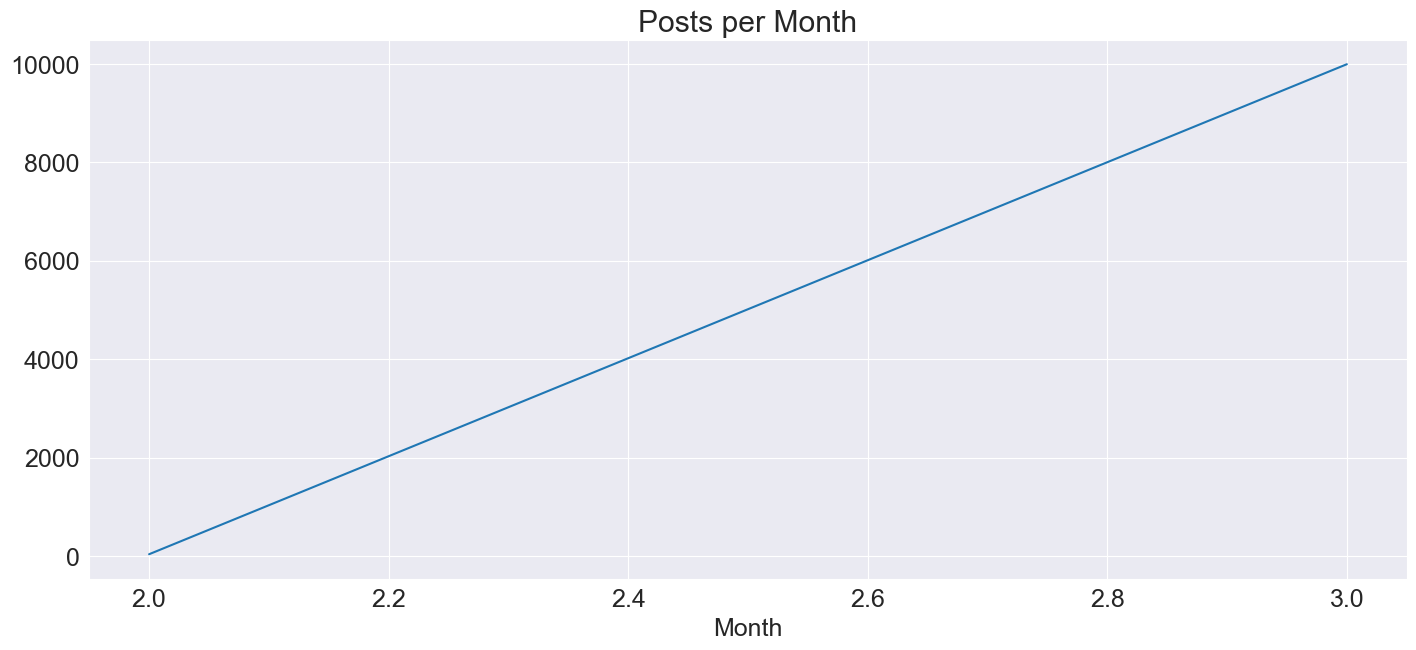

In [145]:
# Plot the distribution of posts by month
data['Month'].value_counts().sort_index().plot(kind='line', title='Posts per Month')